In [40]:
import cv2
import numpy as np

In [41]:
from matplotlib import pyplot as plt

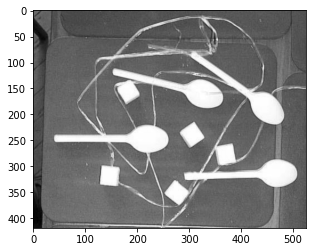

In [42]:
img = cv2.imread('spoons.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

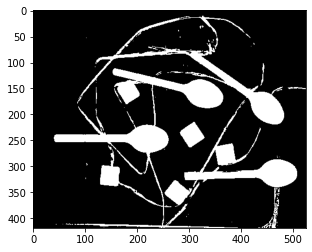

In [43]:
binarised = cv2.threshold(img, 150.0, 255.0, cv2.THRESH_BINARY)[1]
plt.imshow(binarised, cmap='gray')

In [44]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

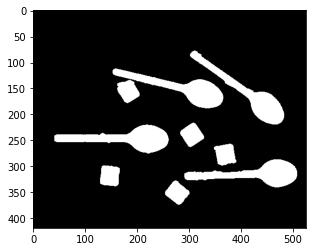

In [45]:
denoised = cv2.erode(binarised, kernel, iterations=2)
denoised = cv2.dilate(denoised, kernel, iterations=2)

plt.imshow(denoised, cmap='gray')

In [46]:
contours, _ = cv2.findContours(denoised, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
spoons_and_sugares = len(contours)
print('spoons and sugares', spoons_and_sugares)

spoons and sugares 9


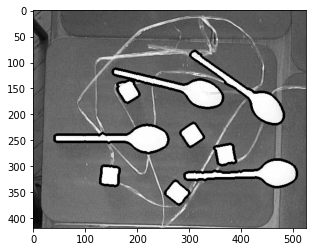

In [47]:
contours_drawn = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

plt.imshow(contours_drawn.copy(), cmap='gray')


spoons:  4
sugares:  5


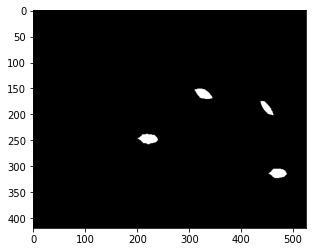

In [48]:
sugares_deleted = cv2.erode(binarised, kernel, iterations=9)
plt.imshow(sugares_deleted, cmap='gray')

contours, _ = cv2.findContours(sugares_deleted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
spoons = len(contours)
print('spoons: ', spoons)
print('sugares: ', spoons_and_sugares - spoons)

In [49]:
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
kernel_20 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))

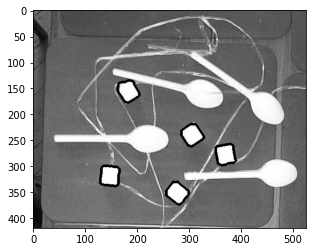

In [51]:
img_mask = cv2.dilate(sugares_deleted, kernel_20, iterations=2)

img_mask = denoised & ~img_mask

img_mask = cv2.erode(img_mask, kernel_20, iterations=1)
img_mask = cv2.dilate(img_mask, kernel_10, iterations=2)
img_mask = cv2.dilate(img_mask, kernel_5, iterations=1)

only_sugares = img_mask & denoised

contours, _ = cv2.findContours(only_sugares, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_drawn = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

plt.imshow(contours_drawn, cmap='gray')

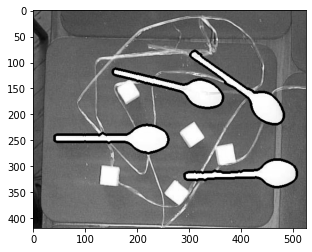

In [56]:
only_spoons_2 = denoised & ~only_sugares
only_spoons_2 = cv2.erode(only_spoons_2, kernel_5, iterations=1)
only_spoons_2 = cv2.dilate(only_spoons_2, kernel_5, iterations=1)

contours, _ = cv2.findContours(only_spoons_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_drawn = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

plt.imshow(contours_drawn, cmap='gray')